<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/DeepLearning/Assignment_41/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
dataset = tf.keras.datasets.fashion_mnist
(X_train, Y_train) , (X_test, Y_test) = dataset.load_data()
(x_train, y_train) , (x_test, y_test) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)

(60000, 28, 28)
0 255 uint8
0 9 uint8


9


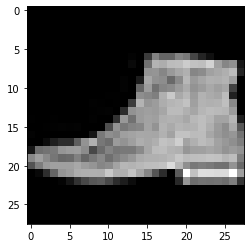

In [ ]:
plt.imshow(X_train[1700] , cmap='gray')
print(Y_train[1700])

**MPL (Machine Learning) For Fashion_mnist** 




In [ ]:
X_train = X_train.reshape(60000 , 784)

In [ ]:
model = tf.keras.models.Sequential([
      layers.Dense(64, input_dim=784, activation = 'relu') ,
      layers.Dense(32, activation = 'relu') ,
      layers.Dense(10, activation = 'softmax') ,

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7261 - accuracy: 0.6779
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6617 - accuracy: 0.7678
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5498 - accuracy: 0.8068
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5062 - accuracy: 0.8239
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4648 - accuracy: 0.8365
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4351 - accuracy: 0.8459
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4192 - accuracy: 0.8532


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000,784)

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4408 - accuracy: 0.8497


[0.44079023599624634, 0.8496999740600586]

**CNN + MLP (Deep Learning) For Fashion_mnist**

In [ ]:
x_train , x_test = x_train /255.0 , x_test / 255.0

In [ ]:
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [ ]:
model = tf.keras.models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
        layers.MaxPool2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train , y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4317 - accuracy: 0.8484
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2908 - accuracy: 0.8961
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2501 - accuracy: 0.9098
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2197 - accuracy: 0.9194
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1943 - accuracy: 0.9297


In [ ]:
Accuracy = model.evaluate(x_test , y_test)
print ("Deep Accuracy ==========>" , Accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.2792 - accuracy: 0.9020
Deep Accuracy ==========> [0.2791820466518402, 0.9020000100135803]
